<a href="https://colab.research.google.com/github/GZanelladev/Data-Science-Course-from-TERA/blob/main/Resolu%C3%A7%C3%A3o_Desafio_Infer%C3%AAncia_TERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução do Desafio de Inferência da Tera

## Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## Carregamento dos bancos de dados

In [ ]:
demo_phq = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Desafio de inferência - Tera/DEMO_PHQ.csv')

pag_hei = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Desafio de inferência - Tera/PAG_HEI.csv')

### Tipos de variáveis do banco demo_phq

In [ ]:
demo_phq.info()
# Informações de 5334 adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [ ]:
demo_phq.head(10)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2,59,4,3,7.0


### Tipos de variáveis do banco pag_hei

In [ ]:
pag_hei.info()
# Informações de 9424 crianças e adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [ ]:
pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


## Unindo os dois bancos de dados

<img src="https://raw.githubusercontent.com/fernandaperes/EA_TCC/master/Joins.png" width="700"/>

In [ ]:
df = demo_phq.merge(pag_hei, on = 'SEQN', how = 'left')
df.info()
# Resulta em um banco com 5334 pessoas, só adultos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

## Tratamento das variáveis

Vamos substituir por valores ausentes os códigos que, de acordo com o dicionário, correspondiam a categorias ausentes.  
Para a variável RIDRETH1, vamos agrupar as categorias 5 e 2, que correspondem a "outros" ([Categorias](https://www.icpsr.umich.edu/web/DSDR/studies/25503/datasets/0203/variables/RIDRETH1?archive=DSDR)).  
Para a variável renda ("INDFMINC"), como há muitas categorias, vamos tratá-la como numérica, usando a média dos valores da categoria ([Categorias](https://www.icpsr.umich.edu/web/NACDA/studies/25504/datasets/0202/variables/INDFMINC?archive=NACDA)).

In [ ]:
df2 = df

In [ ]:
# Substituindo 7 e 9 por valor ausente (NaN) nas colunas 1 a 9 (todas as DPQ)
df2.iloc[:, 1:10] = df2.iloc[:, 1:10].replace({7:np.nan, 9:np.nan})

In [ ]:
replace_map = {
  "RIDRETH1": {5: 2}, # Other
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]),
               3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]),
               7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]),
               11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

df2 = df2.replace(replace_map)

### Análise dos valores ausentes

In [ ]:
df2.isna().sum().sort_values(ascending=False)

DPQ080                      507
DPQ010                      507
DPQ030                      505
DPQ020                      503
DPQ040                      503
DPQ060                      503
DPQ050                      502
DPQ070                      502
DPQ090                      498
HEI2015C5_WHOLEGRAIN        274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015_TOTAL_SCORE         274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C11_REFINEDGRAIN     274
HEI2015C10_SODIUM           274
HEI2015C9_FATTYACID         274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015C8_SEAPLANT_PROT     274
INDFMINC                    160
DMDEDUC                       8
SEQN                          0
ADHERENCE                     0
RIDRETH1                      0
RIDAGEYR                      0
RIAGENDR                      0
PAG_MINW                      0
dtype: i

In [ ]:
df2.shape[0]

5334

In [ ]:
100*df2.isna().sum().sort_values(ascending=False)/df2.shape[0]

DPQ080                      9.505062
DPQ010                      9.505062
DPQ030                      9.467567
DPQ020                      9.430071
DPQ040                      9.430071
DPQ060                      9.430071
DPQ050                      9.411324
DPQ070                      9.411324
DPQ090                      9.336333
HEI2015C5_WHOLEGRAIN        5.136858
HEI2015C3_TOTALFRUIT        5.136858
HEI2015C4_WHOLEFRUIT        5.136858
HEI2015_TOTAL_SCORE         5.136858
HEI2015C6_TOTALDAIRY        5.136858
HEI2015C7_TOTPROT           5.136858
HEI2015C1_TOTALVEG          5.136858
HEI2015C2_GREEN_AND_BEAN    5.136858
HEI2015C11_REFINEDGRAIN     5.136858
HEI2015C10_SODIUM           5.136858
HEI2015C9_FATTYACID         5.136858
HEI2015C12_SFAT             5.136858
HEI2015C13_ADDSUG           5.136858
HEI2015C8_SEAPLANT_PROT     5.136858
INDFMINC                    2.999625
DMDEDUC                     0.149981
SEQN                        0.000000
ADHERENCE                   0.000000
R

### Criação da variável escore PHQ

In [ ]:
df2["phq9"] = df2.iloc[:, 1:10].sum(axis = 'columns', skipna = False)

In [ ]:
df2['phq9'].describe()

count    4799.000000
mean        2.732236
std         3.727676
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: phq9, dtype: float64

### Criação da variável phq_grp
Vamos classificar os escores de acordo com a literatura

In [ ]:
conditions = [
  (df2['phq9'].isna()),
  (df2['phq9'] < 5),
  (df2['phq9'] >= 5) & (df2['phq9'] <= 9),
  (df2['phq9'] > 9) & (df2['phq9'] <= 14),
  (df2['phq9'] > 14) & (df2['phq9'] <= 19),
  (df2['phq9'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

df2["phq_grp"] = np.select(conditions, values) # Construindo a variável

df2[["phq_grp"]].value_counts(sort = False) # Avaliando as frequências

phq_grp
0.0        3796
1.0         706
2.0         201
3.0          73
4.0          23
dtype: int64

Como há poucas pessoas nas categorias 2, 3 e 4, vamos agrupá-las:

In [ ]:
df2["phq_grp2"] = df2["phq_grp"].replace([3, 4], 2)

df2[["phq_grp2"]].value_counts(sort = False)

phq_grp2
0.0         3796
1.0          706
2.0          297
dtype: int64

1) Para as etapas de análise exploratória e teste de hipótese, utilizaremos a variável phq_grp2, com 3 níveis de sintomas de depressão. 

2) Como o percentual de missing está abaixo de 10% para todas as variáveis, não faremos nenhum tratamento para os casos faltantes. 

In [ ]:
label_quali = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro',
               3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio",
              4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
  "phq_grp2": {0: "Sem sintomas", 1: "Sintomas \n leves",
               2: "Sintomas \n moderados-severos"}
}

df2 = df2.replace(label_quali)

In [ ]:
df2.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,phq_grp2
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,Sem sintomas
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,Sem sintomas
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,Sem sintomas
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0.0,Sem sintomas


# EDA Univariada

In [ ]:
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

## Variáveis numéricas

In [ ]:
df2[var_quant].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,4799.00
mean,45.09,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.73
std,20.15,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.73
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
1%,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,24.68,0.00
25%,27.00,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,43.00,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,62.00,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,4.00
99%,85.00,75000.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,85.00,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


Dado que uma semana tem, no máximo, 160 horas (10.080 min) não é possível que alguém tenha feito 10777 min de exercícios semanais.
Nesse caso, iremos truncar a variável PAG_MINW em 3600 min (60 horas semanais).

In [ ]:
df2['PAG_MINW_trunc'] = np.where(df2['PAG_MINW'] > 3600, 3600, df2['PAG_MINW'])

In [ ]:
df2[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
1%,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
99%,3672.06,3600.00
max,10777.83,3600.00


In [ ]:
# Criando a variável PAG_MIN em horas
df2['PAG_HW'] = df2['PAG_MINW_trunc']/60

In [ ]:
# Substituindo PAG_MINW por PAG_HW na lista de variáveis
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_HW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

### Gráficos histograma

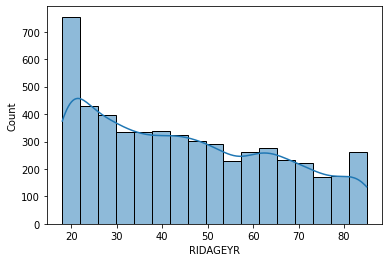

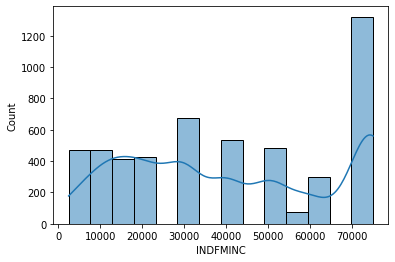

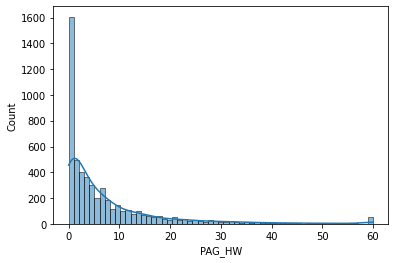

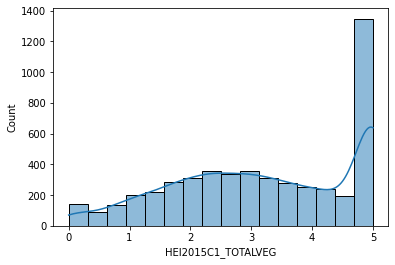

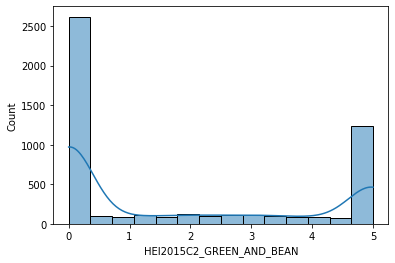

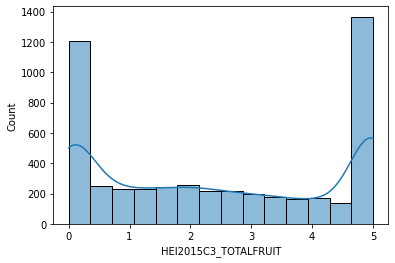

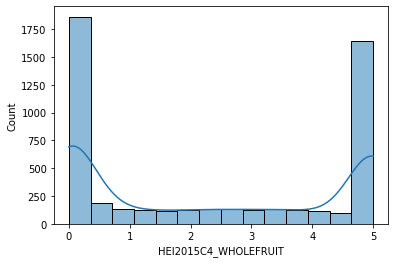

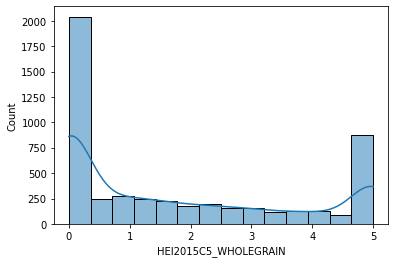

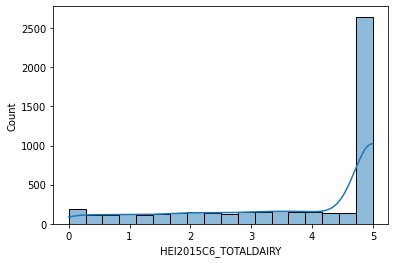

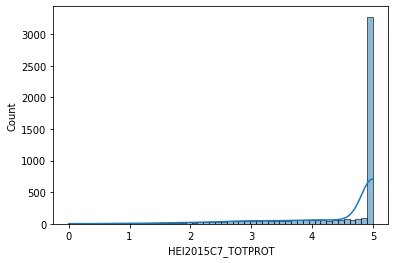

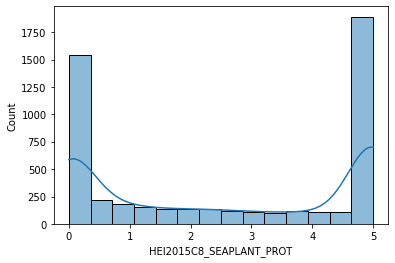

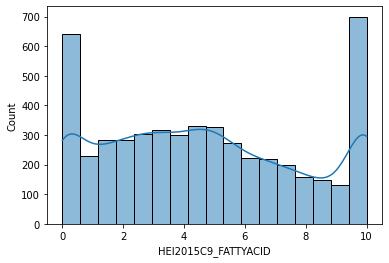

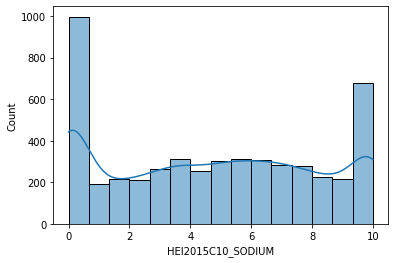

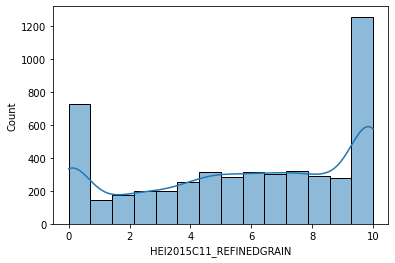

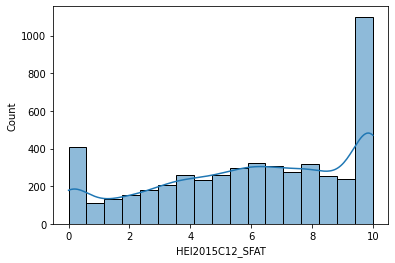

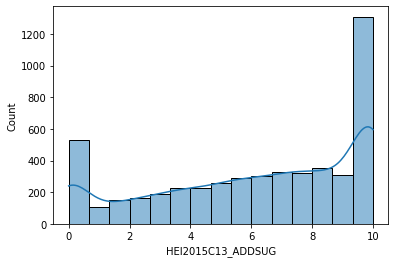

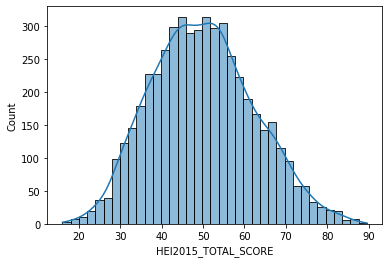

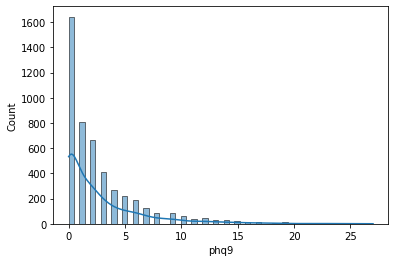

In [ ]:
for var in var_quant:
  sns.histplot(df2[var], kde=True)
  plt.show()

### Variáveis categóricas

In [ ]:
for var in var_quali:
    print(df2[var].value_counts())

Feminino     2773
Masculino    2561
Name: RIAGENDR, dtype: int64
Branco \n não hispânico    2516
Negro \n não hispânico     1300
Americano Mexicano         1133
Outro                       385
Name: RIDRETH1, dtype: int64
Superior \n incompleto    1498
Ensino \n médio           1335
Superior \n completo       939
9-12 ano                   936
< 9 ano                    618
Name: DMDEDUC, dtype: int64
Baixo       2304
Acima       2196
Adequado     834
Name: ADHERENCE, dtype: int64
Sem sintomas                     3796
Sintomas \n leves                 706
Sintomas \n moderados-severos     297
Name: phq_grp2, dtype: int64


In [ ]:
for var in var_quali:
    print(100*df2[var].value_counts(normalize = True))

Feminino     51.987252
Masculino    48.012748
Name: RIAGENDR, dtype: float64
Branco \n não hispânico    47.169104
Negro \n não hispânico     24.371954
Americano Mexicano         21.241095
Outro                       7.217848
Name: RIDRETH1, dtype: float64
Superior \n incompleto    28.126173
Ensino \n médio           25.065715
Superior \n completo      17.630492
9-12 ano                  17.574164
< 9 ano                   11.603455
Name: DMDEDUC, dtype: float64
Baixo       43.194601
Acima       41.169854
Adequado    15.635546
Name: ADHERENCE, dtype: float64
Sem sintomas                     79.099812
Sintomas \n leves                14.711398
Sintomas \n moderados-severos     6.188789
Name: phq_grp2, dtype: float64


### Gráficos de barras para as variáveis categóricas

Definição de uma função para criar esses gráficos

In [ ]:
def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize = True, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proporção"))
    plt.ylim(0,1)
    plt.show()

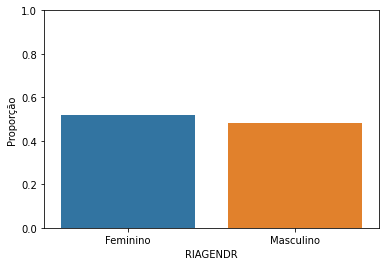

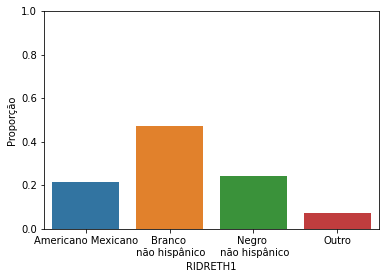

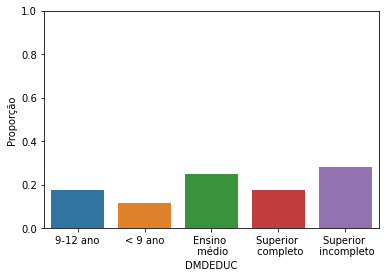

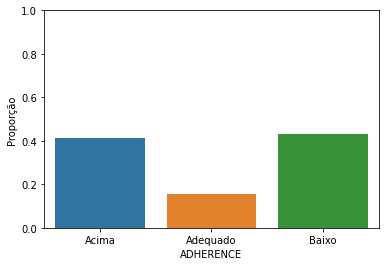

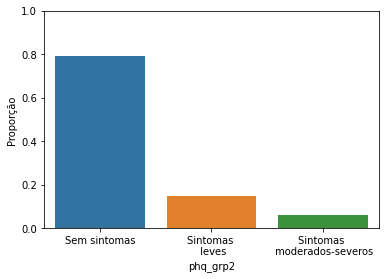

In [ ]:
for var in var_quali:
    grafico_barras_prop(df2, var)
    plt.show()

# EDA Bivariada

In [ ]:
# Atualizando a lista de qualitativas para excluir phq_grp

var_quali = ["RIAGENDR", "RIDRETH1", "DMDEDUC", "ADHERENCE"]

var_quanti = ["RIDAGEYR", "INDFMINC",
              "PAG_HW", "HEI2015C1_TOTALVEG",
              "HEI2015C2_GREEN_AND_BEAN",
              "HEI2015C3_TOTALFRUIT",
              "HEI2015C4_WHOLEFRUIT",
              "HEI2015C5_WHOLEGRAIN",
              "HEI2015C6_TOTALDAIRY",
              "HEI2015C7_TOTPROT",
              "HEI2015C8_SEAPLANT_PROT",
              "HEI2015C9_FATTYACID",
              "HEI2015C10_SODIUM",
              "HEI2015C11_REFINEDGRAIN",
              "HEI2015C12_SFAT",
              "HEI2015C13_ADDSUG",
              "HEI2015_TOTAL_SCORE"]

### Medidas descritivas das variáveis numéricas por grupo (phq_grp)

In [ ]:
from IPython.display import display

for var in var_quant:
    display(df2[['phq_grp2', var]].groupby('phq_grp2').describe().round(2))

RIDAGEYR                                        \
                                 count   mean    std   min   25%   50%   75%   
phq_grp2                                                                       
Sem sintomas                    3796.0  45.11  20.01  18.0  27.0  43.0  62.0   
Sintomas \n leves                706.0  43.19  19.61  18.0  25.0  40.0  58.0   
Sintomas \n moderados-severos    297.0  44.18  17.56  18.0  29.0  45.0  56.0   

                                     
                                max  
phq_grp2                             
Sem sintomas                   85.0  
Sintomas \n leves              85.0  
Sintomas \n moderados-severos  85.0

INDFMINC                                       \
                                 count      mean       std     min      25%   
phq_grp2                                                                      
Sem sintomas                    3715.0  42743.23  24205.86  2499.5  22499.5   
Sintomas \n leves                674.0  38100.48  24091.54  2499.5  17499.5   
Sintomas \n moderados-severos    291.0  29080.31  22825.18  2499.5  12499.5   

                                                          
                                   50%      75%      max  
phq_grp2                                                  
Sem sintomas                   39999.5  69999.5  75000.0  
Sintomas \n leves              29999.5  59999.5  75000.0  
Sintomas \n moderados-severos  22499.5  39999.5  75000.0

PAG_HW                                       \
                                count  mean    std  min   25%   50%    75%   
phq_grp2                                                                     
Sem sintomas                   3796.0  8.09  11.18  0.0  0.92  3.96  10.39   
Sintomas \n leves               706.0  7.39  11.63  0.0  0.50  3.12   8.37   
Sintomas \n moderados-severos   297.0  4.74   9.08  0.0  0.00  1.50   5.39   

                                     
                                max  
phq_grp2                             
Sem sintomas                   60.0  
Sintomas \n leves              60.0  
Sintomas \n moderados-severos  60.0

HEI2015C1_TOTALVEG                               \
                                           count  mean   std  min   25%   50%   
phq_grp2                                                                        
Sem sintomas                              3729.0  3.24  1.45  0.0  2.10  3.25   
Sintomas \n leves                          687.0  3.09  1.50  0.0  1.95  3.09   
Sintomas \n moderados-severos              288.0  3.05  1.49  0.0  1.92  3.08   

                                          
                                75%  max  
phq_grp2                                  
Sem sintomas                   4.87  5.0  
Sintomas \n leves              4.58  5.0  
Sintomas \n moderados-severos  4.36  5.0

HEI2015C2_GREEN_AND_BEAN                        \
                                                 count  mean   std  min  25%   
phq_grp2                                                                       
Sem sintomas                                    3729.0  1.81  2.14  0.0  0.0   
Sintomas \n leves                                687.0  1.80  2.12  0.0  0.0   
Sintomas \n moderados-severos                    288.0  1.55  2.07  0.0  0.0   

                                                
                                50%   75%  max  
phq_grp2                                        
Sem sintomas                   0.07  4.52  5.0  
Sintomas \n leves              0.20  4.25  5.0  
Sintomas \n moderados-severos  0.00  3.61  5.0

HEI2015C3_TOTALFRUIT                         \
                                             count  mean   std  min   25%   
phq_grp2                                                                    
Sem sintomas                                3729.0  2.54  1.95  0.0  0.50   
Sintomas \n leves                            687.0  2.29  1.93  0.0  0.32   
Sintomas \n moderados-severos                288.0  2.23  1.97  0.0  0.08   

                                                
                                50%   75%  max  
phq_grp2                                        
Sem sintomas                   2.41  5.00  5.0  
Sintomas \n leves              1.97  4.37  5.0  
Sintomas \n moderados-severos  1.96  4.32  5.0

HEI2015C4_WHOLEFRUIT                        \
                                             count  mean   std  min  25%   
phq_grp2                                                                   
Sem sintomas                                3729.0  2.42  2.17  0.0  0.0   
Sintomas \n leves                            687.0  2.18  2.16  0.0  0.0   
Sintomas \n moderados-severos                288.0  2.05  2.12  0.0  0.0   

                                                
                                50%   75%  max  
phq_grp2                                        
Sem sintomas                   2.23  5.00  5.0  
Sintomas \n leves              1.37  5.00  5.0  
Sintomas \n moderados-severos  1.18  4.89  5.0

HEI2015C5_WHOLEGRAIN                        \
                                             count  mean   std  min  25%   
phq_grp2                                                                   
Sem sintomas                                3729.0  1.81  1.93  0.0  0.0   
Sintomas \n leves                            687.0  1.69  1.84  0.0  0.0   
Sintomas \n moderados-severos                288.0  1.47  1.81  0.0  0.0   

                                                
                                50%   75%  max  
phq_grp2                                        
Sem sintomas                   1.07  3.54  5.0  
Sintomas \n leves              1.01  3.07  5.0  
Sintomas \n moderados-severos  0.40  2.91  5.0

HEI2015C6_TOTALDAIRY                         \
                                             count  mean   std  min   25%   
phq_grp2                                                                    
Sem sintomas                                3729.0  3.78  1.59  0.0  2.65   
Sintomas \n leves                            687.0  3.77  1.59  0.0  2.60   
Sintomas \n moderados-severos                288.0  3.71  1.60  0.0  2.54   

                                               
                                50%  75%  max  
phq_grp2                                       
Sem sintomas                   4.98  5.0  5.0  
Sintomas \n leves              4.95  5.0  5.0  
Sintomas \n moderados-severos  4.66  5.0  5.0

HEI2015C7_TOTPROT                              \
                                          count  mean   std  min   25%  50%   
phq_grp2                                                                      
Sem sintomas                             3729.0  4.46  0.98  0.0  4.25  5.0   
Sintomas \n leves                         687.0  4.33  1.07  0.0  3.88  5.0   
Sintomas \n moderados-severos             288.0  4.35  1.12  0.0  4.00  5.0   

                                         
                               75%  max  
phq_grp2                                 
Sem sintomas                   5.0  5.0  
Sintomas \n leves              5.0  5.0  
Sintomas \n moderados-severos  5.0  5.0

HEI2015C8_SEAPLANT_PROT                         \
                                                count  mean   std  min   25%   
phq_grp2                                                                       
Sem sintomas                                   3729.0  2.61  2.17  0.0  0.03   
Sintomas \n leves                               687.0  2.55  2.14  0.0  0.00   
Sintomas \n moderados-severos                   288.0  2.30  2.15  0.0  0.00   

                                               
                                50%  75%  max  
phq_grp2                                       
Sem sintomas                   2.61  5.0  5.0  
Sintomas \n leves              2.59  5.0  5.0  
Sintomas \n moderados-severos  1.91  5.0  5.0

HEI2015C9_FATTYACID                         \
                                            count  mean   std  min   25%   
phq_grp2                                                                   
Sem sintomas                               3729.0  4.73  3.24  0.0  2.03   
Sintomas \n leves                           687.0  4.71  3.20  0.0  2.01   
Sintomas \n moderados-severos               288.0  4.36  3.16  0.0  1.63   

                                                 
                                50%   75%   max  
phq_grp2                                         
Sem sintomas                   4.43  7.30  10.0  
Sintomas \n leves              4.48  7.15  10.0  
Sintomas \n moderados-severos  4.09  6.76  10.0

HEI2015C10_SODIUM                               \
                                          count  mean   std  min   25%   50%   
phq_grp2                                                                       
Sem sintomas                             3729.0  4.69  3.41  0.0  1.48  4.76   
Sintomas \n leves                         687.0  4.87  3.40  0.0  1.71  4.95   
Sintomas \n moderados-severos             288.0  5.20  3.47  0.0  2.60  5.14   

                                           
                                75%   max  
phq_grp2                                   
Sem sintomas                   7.56  10.0  
Sintomas \n leves              7.75  10.0  
Sintomas \n moderados-severos  8.43  10.0

HEI2015C11_REFINEDGRAIN                         \
                                                count  mean   std  min   25%   
phq_grp2                                                                       
Sem sintomas                                   3729.0  5.82  3.47  0.0  2.99   
Sintomas \n leves                               687.0  5.68  3.55  0.0  2.78   
Sintomas \n moderados-severos                   288.0  6.09  3.52  0.0  3.34   

                                                 
                                50%   75%   max  
phq_grp2                                         
Sem sintomas                   6.22  9.24  10.0  
Sintomas \n leves              6.11  9.31  10.0  
Sintomas \n moderados-severos  6.85  9.58  10.0

HEI2015C12_SFAT                               \
                                        count  mean   std  min   25%   50%   
phq_grp2                                                                     
Sem sintomas                           3729.0  6.05  3.18  0.0  3.68  6.36   
Sintomas \n leves                       687.0  6.08  3.10  0.0  3.90  6.44   
Sintomas \n moderados-severos           288.0  5.78  3.31  0.0  2.92  6.38   

                                           
                                75%   max  
phq_grp2                                   
Sem sintomas                   9.00  10.0  
Sintomas \n leves              8.85  10.0  
Sintomas \n moderados-severos  8.66  10.0

HEI2015C13_ADDSUG                               \
                                          count  mean   std  min   25%   50%   
phq_grp2                                                                       
Sem sintomas                             3729.0  6.31  3.29  0.0  3.89  6.95   
Sintomas \n leves                         687.0  5.92  3.42  0.0  3.15  6.62   
Sintomas \n moderados-severos             288.0  5.45  3.65  0.0  2.19  5.67   

                                           
                                75%   max  
phq_grp2                                   
Sem sintomas                   9.54  10.0  
Sintomas \n leves              9.05  10.0  
Sintomas \n moderados-severos  9.16  10.0

HEI2015_TOTAL_SCORE                              \
                                            count   mean    std    min    25%   
phq_grp2                                                                        
Sem sintomas                               3729.0  50.25  12.44  16.06  41.20   
Sintomas \n leves                           687.0  48.97  11.97  16.49  40.51   
Sintomas \n moderados-severos               288.0  47.59  11.50  21.63  39.11   

                                                    
                                 50%    75%    max  
phq_grp2                                            
Sem sintomas                   49.88  58.55  89.53  
Sintomas \n leves              48.43  56.78  82.95  
Sintomas \n moderados-severos  46.50  55.95  83.30

phq9                                       \
                                count   mean   std   min   25%   50%   75%   
phq_grp2                                                                     
Sem sintomas                   3796.0   1.17  1.29   0.0   0.0   1.0   2.0   
Sintomas \n leves               706.0   6.48  1.36   5.0   5.0   6.0   7.0   
Sintomas \n moderados-severos   297.0  13.74  3.65  10.0  11.0  13.0  15.0   

                                     
                                max  
phq_grp2                             
Sem sintomas                    4.0  
Sintomas \n leves               9.0  
Sintomas \n moderados-severos  27.0

### Gráficos boxplot das variáveis numéricas por grupo

Definição de uma função para criar esses gráficos

In [ ]:
def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp2", y=variable, data=data.replace({'phq_grp2': {0: "Sem sintomas", 
                                                                          1: "Sintomas leves",
                                                                          2: "Sintomas mod-graves"}}))
    plt.ylabel(label)
    plt.show()

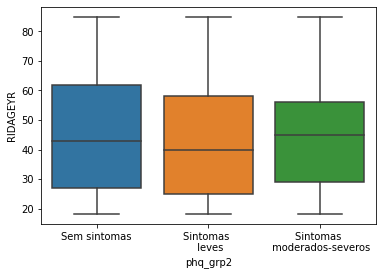

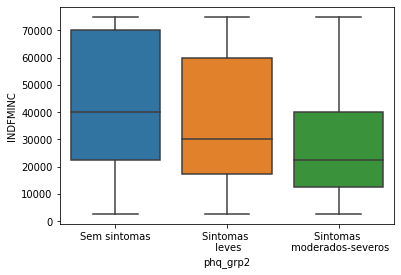

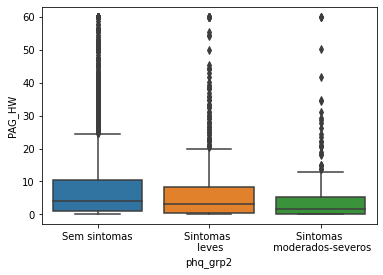

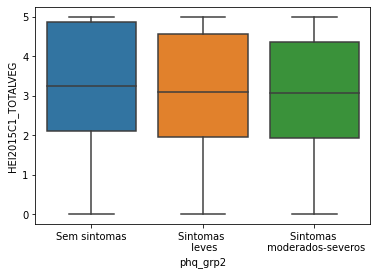

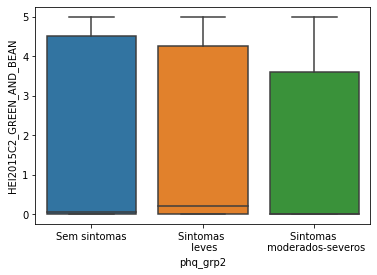

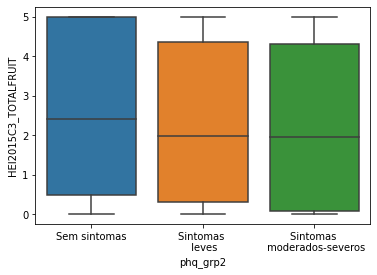

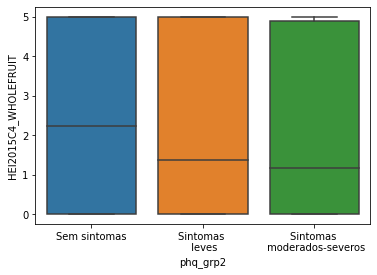

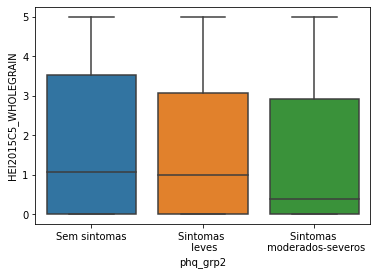

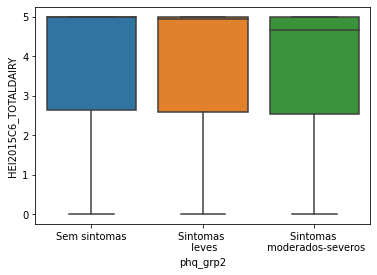

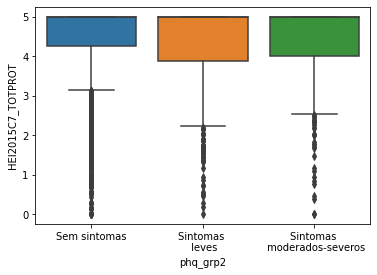

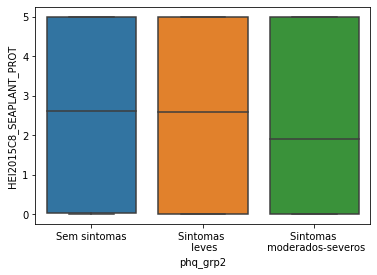

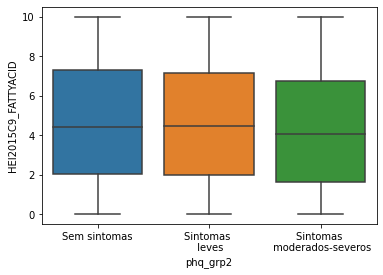

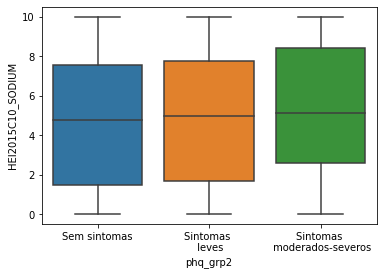

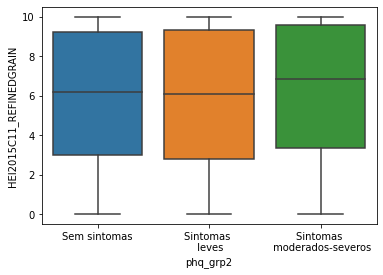

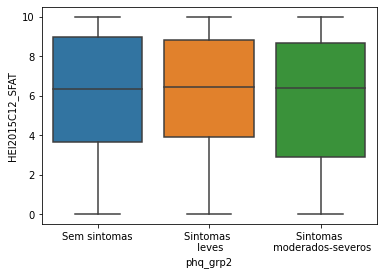

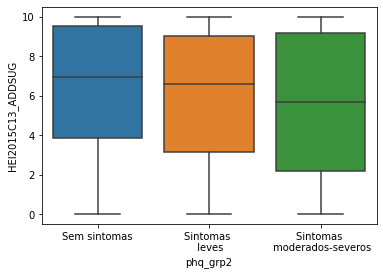

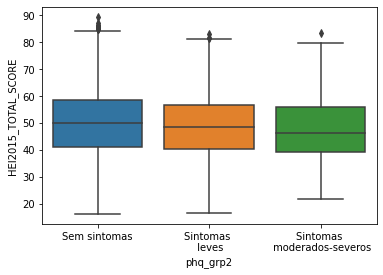

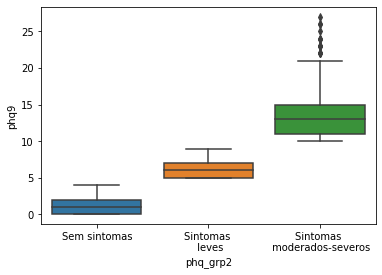

In [ ]:
for var in var_quant:
    grafico_boxplot_grp(df2, var, "")

### Gráfico das variáveis categóricas por grupo

In [ ]:
def grafico_barras_prop_grp(data, variable):
    (data
     .groupby(variable)['phq_grp2']
     .value_counts(normalize = True, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe((sns.catplot, "data"), x=variable, y="Proporção", hue = 'phq_grp2', kind="bar"))
    plt.ylim(0,1)
    plt.show()

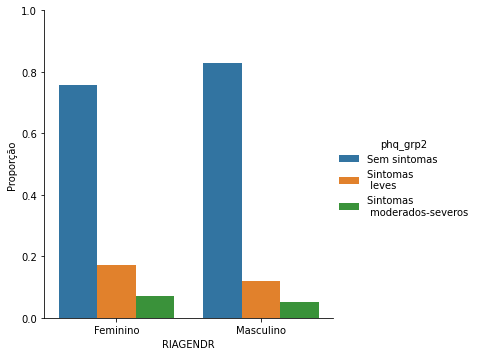

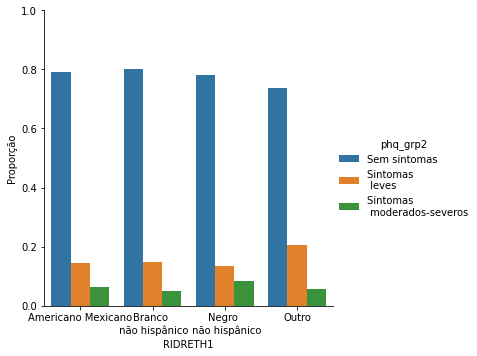

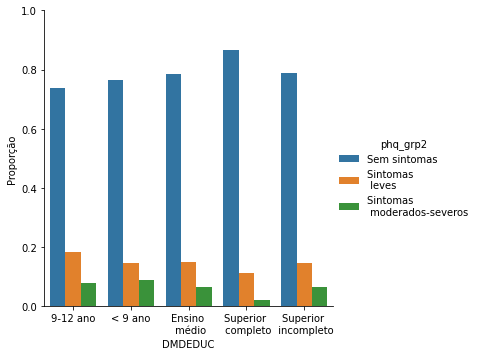

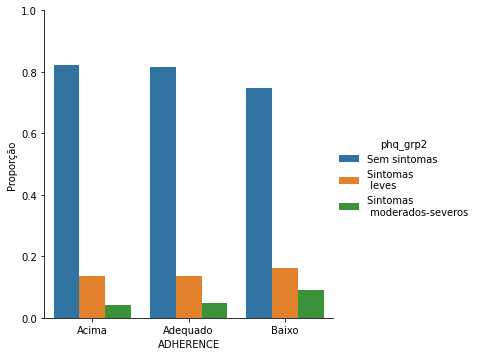

In [ ]:
for var in var_quali:
    grafico_barras_prop_grp(df2, var)

# Testes de Hipóteses

## Há associação entre gênero e depressão?

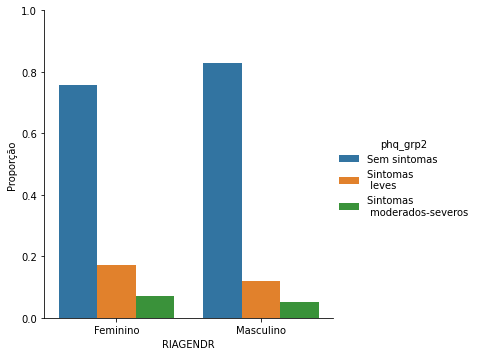

In [ ]:
grafico_barras_prop_grp(df2, 'RIAGENDR')

### Teste de hipóteses - Qui-quadrado de independência

Neste caso queremos comparar as proporções (prevalências) de sintomas de depressão entre os gêneros. Como queremos avaliar a associação entre duas variáveis categóricas, usaremos o teste qui-quadrado.

As hipóteses desse teste serão:

* H0 (nula) = Não há associação entre gênero e sintomas de depressão.
* H1 (alternativa) = Há associação entre gênero e sintomas de depressão.

In [ ]:
100*pd.crosstab(df2['RIAGENDR'],
                df2['phq_grp2'],
                normalize='index')

phq_grp2,Sem sintomas,Sintomas \n leves,Sintomas \n moderados-severos
RIAGENDR,,,
Feminino,75.713711,17.129071,7.157218
Masculino,82.742215,12.110727,5.147059


In [ ]:
crosstab = pd.crosstab(df2['RIAGENDR'],
                       df2['phq_grp2'])
crosstab

phq_grp2,Sem sintomas,Sintomas \n leves,Sintomas \n moderados-severos
RIAGENDR,,,
Feminino,1883,426,178
Masculino,1913,280,119


In [ ]:
from scipy.stats import chi2_contingency

stat, p, df, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat, p))

stat = 35.816, p = 0.000


O valor de p do teste foi p < 0,001.

Interpretação do valor de p: se a hipótese nula fosse verdadeira, qual a probabilidade de observarmos as diferenças que estamos observando na amostra?

Neste caso, a probabilidade é bem baixa (p < 0,05), ou seja, o que estamos observando na amostra é algo bem improvável de ocorrer se a hipótese nula for verdadeira e, portanto, temos indícios para rejeitar essa hipótese. Sendo assim, há associação entre gênero e os grupos de depressão (as prevalências são diferentes em homens e mulheres) - sendo maiores em mulheres.

In [ ]:
table = sm.stats.Table(crosstab)
table.standardized_resids

phq_grp2,Sem sintomas,Sintomas \n leves,Sintomas \n moderados-severos
RIAGENDR,,,
Feminino,-5.983516,4.903932,2.88773
Masculino,5.983516,-4.903932,-2.88773


Para verificar em quais células da tabela a frequência observada (ou seja, a prevalência de sintomas depressivos) diferiu estatisticamente da frequência esperada (caso não houvesse associação entre sintomas depressivos e gênero), podemos avaliar os resíduos padronizados (acima).
Consideraremos estatisticamente significativos resíduos fora do intervalo [-1,96; 1,96].  
  
Uma breve explicação sobre qui-quadrado de independência e resíduos pode ser encontrada [aqui](https://www.instagram.com/p/CTzfJS7AmyF/?utm_source=ig_web_copy_link).  
  
No nosso caso, todas as células apresentaram diferenças estatisticamente significativas. As mulheres apresentam prevalências de sintomas leves e moderados-severos superiores às dos homens.

In [ ]:
# Função para cálculo do tamanho de efeito (V de Cramer)
# Fonte: https://towardsdatascience.com/contingency-tables-chi-squared-and-cramers-v-ada4f93ec3fd

def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    from scipy.stats import chi2_contingency

    # effect size data frame for cramer's v function
    data = np.array([[1, .1, .3, .5],
       [2, .07, .21, .35],
       [3, .06, .17, .29],
       [4, .05,.15,.25],
       [5, .04, .13, .22]])
    sizes = pd.DataFrame(data, columns=['Graus de Liberdade', 'Efeito Pequeno', 'Efeito Médio', 'Efeito Grande']) 
    
    # getting the chi sq. stat
    chi2 = chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    print(f'V de Cramer = {v}')
    print(f'Graus de liberdade do V de Cramer = {dof}')
    print(f'\nClassificação do V de Cramer\n{sizes}\n')

In [ ]:
cramers_v(crosstab)

V de Cramer = 0.0863903661361791
Graus de liberdade do V de Cramer = 1

Classificação do V de Cramer
   Graus de Liberdade  Efeito Pequeno  Efeito Médio  Efeito Grande
0                 1.0            0.10          0.30           0.50
1                 2.0            0.07          0.21           0.35
2                 3.0            0.06          0.17           0.29
3                 4.0            0.05          0.15           0.25
4                 5.0            0.04          0.13           0.22



É importante também avaliarmos um tamanho de efeito. Em amostras de tamanho grande, como a nossa, os valores de p tendem a ser pequenos ainda que as diferenças entre os grupos sejam bem pequenas (ou seja, irrelevantes na prática).  
  
O tamanho de efeito para o teste qui-quadrado é o V de Cramer, que pode ser calculado e classificado de acordo com as instruções acima.
A referência para essa classificação do V de Cramer é o livro do Cohen de 1988.  
  
  
*Cohen, J. (1988). Statistical power analysis for the behavioral sciences, 2nd ed. Hillsdale, NJ: Erlbaum.*

## As médias de idade são as mesmas para os três grupos de depressão?

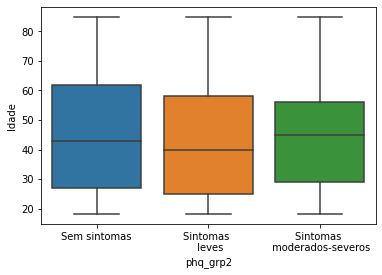

In [ ]:
grafico_boxplot_grp(df2, "RIDAGEYR", "Idade")

### Teste de hipóteses - ANOVA

Neste caso queremos comparar a média de idade para os três grupos de sintomas de depressão. Como queremos comparar as médias de mais de dois grupos independentes, teste F da ANOVA será utilizado.

As hipóteses desse teste serão:

* H0 (nula) = Não existe diferença entre os grupos de depressão com relação à média de idade.
* H1 (alternativa) = Existe pelo menos uma diferença na média de idade entre os grupos de sintomas de depressão.

In [ ]:
from scipy.stats import f_oneway

df_aux = df2[["phq_grp2", "RIDAGEYR"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp2 == "Sem sintomas")]["RIDAGEYR"],
                   df_aux[(df_aux.phq_grp2 == "Sintomas \n leves")]["RIDAGEYR"],
                   df_aux[(df_aux.phq_grp2 == "Sintomas \n moderados-severos")]["RIDAGEYR"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=2.935, p=0.053


O valor de p do teste foi p = 0,053.

Interpretação do valor de p: Se a hipótese nula fosse verdadeira, qual a probabilidade de observarmos as diferenças que estamos observando na amostra?

Neste caso, a probabilidade é acima do nosso ponto de corte (p = 0,053), ou seja, o que estamos observando na amostra é algo bem provável de ocorrer se a hipótese nula for verdadeira e, portanto, não temos indícios para rejeitar a hipótese nula. Sendo assim, não conseguimos detectar uma diferença estatisticamente significativa entre os grupos de depressão com relação à media de idade.

## As médias de renda familiar são as mesmas para os três grupos de depressão?

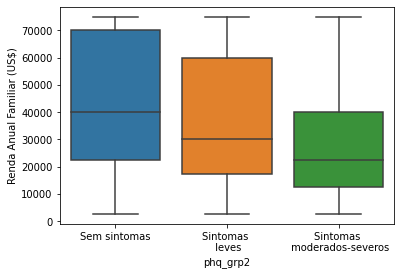

In [ ]:
grafico_boxplot_grp(df2, "INDFMINC", "Renda Anual Familiar (US$)")

### Teste de hipóteses - ANOVA

Neste caso queremos comparar a média de renda familiar para os três grupos de sintomas de depressão. Como queremos comparar as médias de mais de dois grupos independentes, teste F da ANOVA será utilizado.

As hipóteses desse teste serão:

* H0 (nula) = Não existe diferença entre os grupos de depressão com relação à média de renda familiar.
* H1 (alternativa) = Existe pelo menos uma diferença na média de renda familiar entre os grupos de sintomas de depressão.

In [ ]:
from scipy.stats import f_oneway

df_aux = df2[["phq_grp2", "INDFMINC"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp2 == "Sem sintomas")]["INDFMINC"],
                   df_aux[(df_aux.phq_grp2 == "Sintomas \n leves")]["INDFMINC"],
                   df_aux[(df_aux.phq_grp2 == "Sintomas \n moderados-severos")]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=49.960, p=0.000


Neste caso estamos testando a hipótese nula "Não existe diferença entre os grupos de depressão com relação à média de renda familiar". Como p < 0,05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas com relação a renda média, iremos realizar comparações multiplas para investigar quais diferenças são significativas:

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

label = {"phq_grp2":
         {"Sem sintomas": "Sem sintomas",
          "Sintomas \n leves": "Sintomas leves",
          "Sintomas \n moderados-severos": "Sintomas moderados-severos"}}

df_aux = df_aux.replace(label)

tukey = pairwise_tukeyhsd(df_aux["INDFMINC"],
                  df_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
    group1               group2             meandiff  p-adj    lower       upper    reject
------------------------------------------------------------------------------------------
  Sem sintomas             Sintomas leves  -4642.7491   0.0  -7008.8899  -2276.6083   True
  Sem sintomas Sintomas moderados-severos -13662.9166   0.0 -17103.2198 -10222.6134   True
Sintomas leves Sintomas moderados-severos  -9020.1675   0.0 -12984.3566  -5055.9784   True
------------------------------------------------------------------------------------------


Com as comparações múltiplas, estamos realizando três testes de hipótese **simultaneamente**. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05. 

Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.001

Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

1. A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas leves
2. A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas moderados-severos
3. A renda média do grupo sintomas leves é diferente da renda média do grupo sintomas moderados-severos

## As médias de horas semanais de exercícios são as mesmas para os três grupos de depressão?

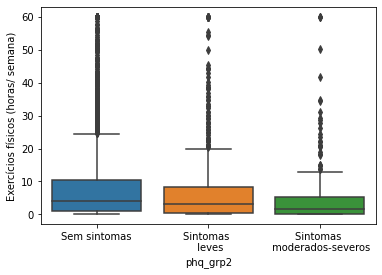

In [ ]:
grafico_boxplot_grp(df2, "PAG_HW", "Exercícios físicos (horas/ semana)")

### Teste de hipóteses - ANOVA

Neste caso queremos comparar a média horas semanais de exercício físico para os três grupos de sintomas de depressão. Como queremos comparar as médias de mais de dois grupos independentes, teste F da ANOVA será utilizado.

As hipóteses desse teste serão:

* H0 (nula) = Não existe diferença entre os grupos de depressão com relação à média de horas semanais de exercício físico.
* H1 (alternativa) = Existe pelo menos uma diferença na média de horas semanais de exercício físico entre os grupos de sintomas de depressão.

In [ ]:
from scipy.stats import f_oneway

df_aux = df2[["phq_grp2", "PAG_HW"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp2 == "Sem sintomas")]["PAG_HW"],
                   df_aux[(df_aux.phq_grp2 == "Sintomas \n leves")]["PAG_HW"],
                   df_aux[(df_aux.phq_grp2 == "Sintomas \n moderados-severos")]["PAG_HW"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=12.983, p=0.000


Neste caso estamos testando a hipótese nula "Não existe diferença entre os grupos de depressão com relação à média de horas semanais de exercício físico". Como p < 0,05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas com relação à média de horas semanais de exercício físico, iremos realizar comparações multiplas para investigar quais diferenças são signiticativas:

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_aux = df_aux.replace(label)

tukey = pairwise_tukeyhsd(df_aux["PAG_HW"],
                  df_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
    group1               group2           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
  Sem sintomas             Sintomas leves  -0.7026 0.2724 -1.7724  0.3671  False
  Sem sintomas Sintomas moderados-severos    -3.35    0.0 -4.9226 -1.7773   True
Sintomas leves Sintomas moderados-severos  -2.6473 0.0017 -4.4525 -0.8422   True
--------------------------------------------------------------------------------


Com as comparações múltiplas, estamos realizando três testes de hipótese **simultaneamente**. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05. 

Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.273

Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

1. O tempo médio de exercício físico por semana do grupo Sem sintomas não é diferente do tempo médio de exercício físico por semana do grupo de sintomas leves
2. O tempo médio de exercício físico por semana do grupo Sem sintomas é diferente do tempo médio de exercício físico por semana do grupo de sintomas moderados-severos
3. O tempo médio de exercício físico por semana do grupo sintomas leves é diferente do tempo médio de exercício físico por semana do grupo sintomas moderados-severos

## Importante lembrar
Os testes têm pressupostos. No caso da ANOVA, há o pressuposto de normalidade por grupo (que pode ser avaliado com o teste de Shapiro-Wilk, ou com uma análise gráfica, por exemplo, com um gráfico qqplot) e o de homogeneidade de variâncias (que pode ser avaliado pelo teste de Levene).  
No entanto, há evidências de que esse teste é robusto a violações do pressuposto de normalidade, principalmente quando o n é grande.

## Há associação entre gênero e renda?

Fica aí uma sugestão de pergunta para você responder :)